#### Qualidade de vinhos tintos

Vamos usar árvores de decisão para classificar uma base de dados sobre qualidade de vinhos. Em seguida, vamos avaliar o desempenho da classificação. Para isso, vamos dividir o conjunto de dados em treinamento e teste.

#### URL do conjunto de dados disponivel em:
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

Fonte: UCI Machine Learning Repository, Centro para Aprendizado de Máquina e Sistemas Inteligentes, Universidade da Califórnia, Irvine.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df_vinhos = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
                       sep=';')

In [3]:
df_vinhos.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [10]:
df_vinhos.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [43]:
df_vinhos.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
df_vinhos.shape

(1599, 12)

In [35]:
df_vinhos['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [14]:
#Separação em classes e atributos
vinhos_colunas = df_vinhos.columns[0:11].values.tolist()
vinhos_atributos = df_vinhos[vinhos_colunas]
vinhos_classes = df_vinhos['quality']

In [17]:
#Separação em teste e treino na proporção 80:20
vinho_atributos_treino, vinho_atributos_teste, vinho_classes_treino, vinho_classes_teste = train_test_split(vinhos_atributos, vinhos_classes, test_size=0.2, random_state=10)

In [18]:
videira = DecisionTreeClassifier()
videira = videira.fit(vinho_atributos_treino, vinho_classes_treino)

In [22]:
vinho_predicao = videira.predict(vinho_atributos_teste)
acuracia = accuracy_score(vinho_classes_teste, vinho_predicao)
print('Acurácia do classificador: {}'.format(acuracia))

Acurácia do classificador: 0.628125


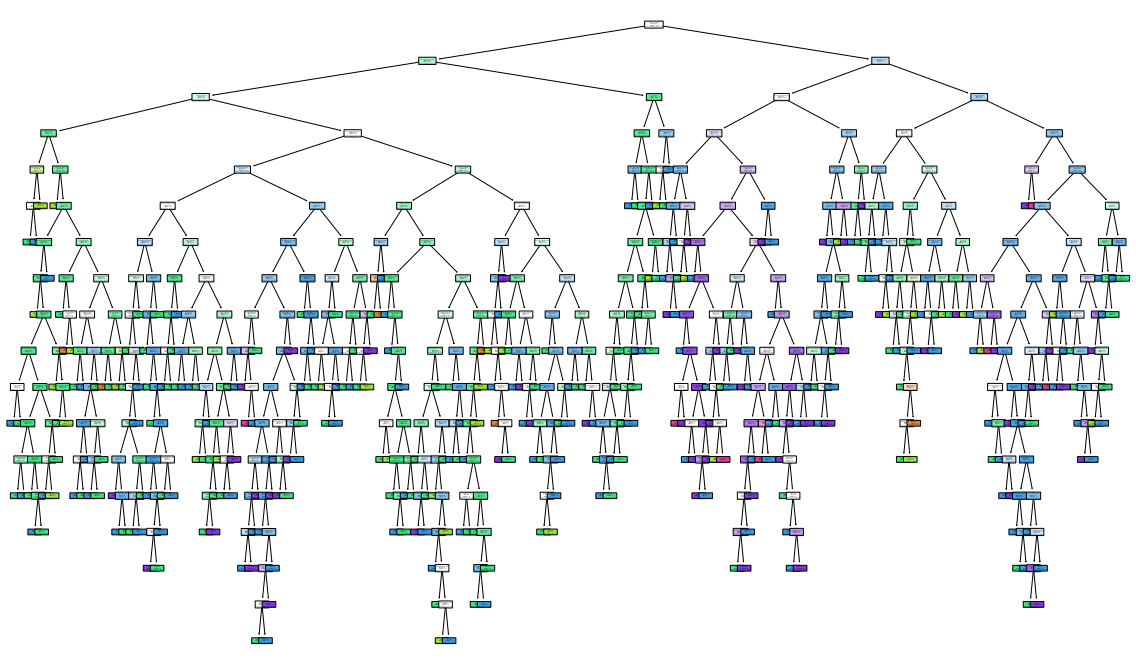

In [38]:
plt.figure(figsize=(20,12))
plot_tree(videira, filled=True, rounded=True, class_names=['3','4','5','6','7','8'], feature_names=vinhos_colunas)
plt.show()

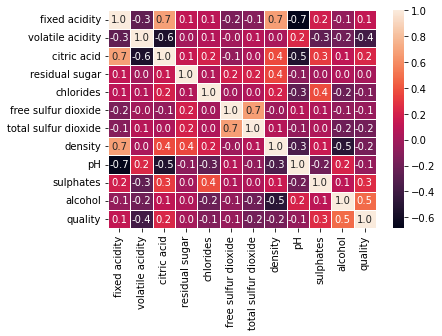

In [36]:
plot = sb.heatmap(df_vinhos.corr(), annot = True, fmt=".1f", linewidths=.6)
plot;

In [46]:
#para reduzir o numero de atributos vamos descartar aqueles com maior correlação
df_vinhos_red = df_vinhos.drop(columns=['free sulfur dioxide','citric acid', 'density', 'fixed acidity'])

In [47]:
df_vinhos_red.head()

,volatile acidity,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0.70,1.9,0.076,34.0,3.51,0.56,9.4,5
1,0.88,2.6,0.098,67.0,3.20,0.68,9.8,5
2,0.76,2.3,0.092,54.0,3.26,0.65,9.8,5
3,0.28,1.9,0.075,60.0,3.16,0.58,9.8,6
4,0.70,1.9,0.076,34.0,3.51,0.56,9.4,5


In [49]:
#Separação em classes e atributos
vinhos_colunas_red = df_vinhos_red.columns[0:6].values.tolist()
vinhos_atributos_red = df_vinhos_red[vinhos_colunas_red]
vinhos_classes_red = df_vinhos_red['quality']

In [50]:
vinho_red_atributos_treino, vinho_red_atributos_teste, vinho_red_classes_treino, vinho_red_classes_teste = train_test_split(vinhos_atributos_red, vinhos_classes_red, test_size=0.2, random_state=10)

In [51]:
videira2 = DecisionTreeClassifier()
videira2 = videira.fit(vinho_red_atributos_treino, vinho_red_classes_treino)

In [52]:
vinho_predicao2 = videira2.predict(vinho_red_atributos_teste)
acuracia2 = accuracy_score(vinho_red_classes_teste, vinho_predicao2)
print('Acurácia do classificador: {}'.format(acuracia2))

Acurácia do classificador: 0.56875


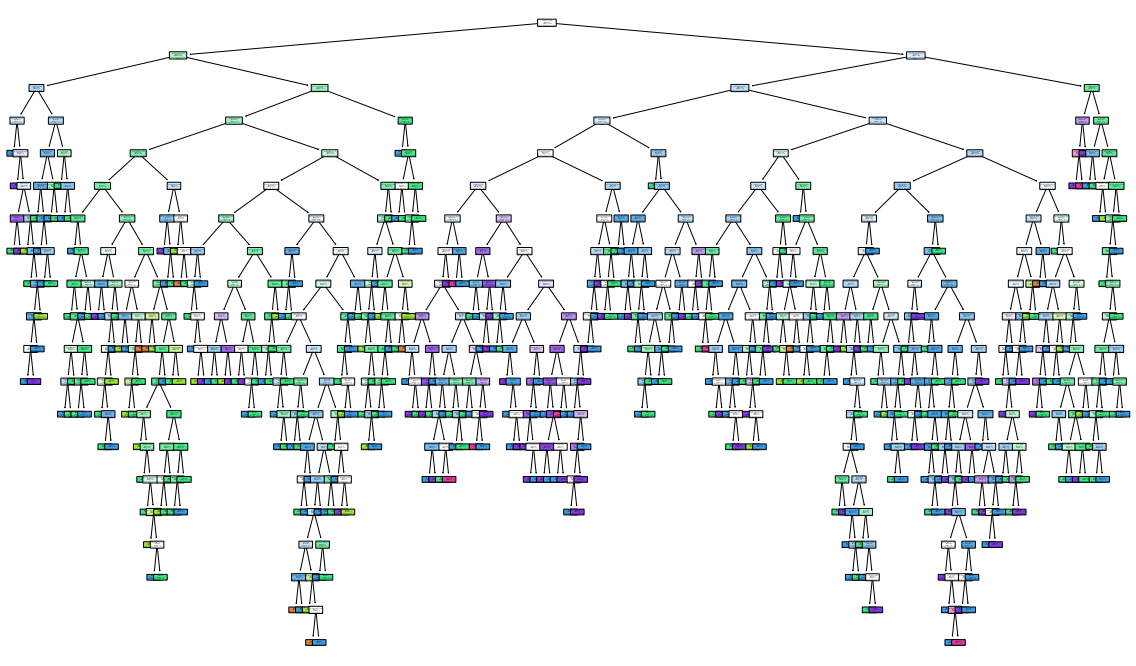

In [54]:
plt.figure(figsize=(20,12))
plot_tree(videira2, filled=True, rounded=True, class_names=['3','4','5','6','7','8'], feature_names=vinhos_colunas_red)
plt.show()